In [43]:
import pandas as pd
df = pd.read_csv('/content/Politics.csv')
df.head()

,Text,Label
0,The government's recent policies have received...,positive
1,Political analysts are divided on the long-ter...,negative
2,Efforts to promote unity among political facti...,positive
3,"Despite allegations of corruption, the governm...",negative
4,The recent diplomatic initiatives have been me...,positive


In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

tfidf = TfidfVectorizer(max_features=1000)
X = tfidf.fit_transform(df['Text'])
y = df['Label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(f"Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7272727272727273

Classification Report:
               precision    recall  f1-score   support

    negative       0.71      0.83      0.77         6
    positive       0.75      0.60      0.67         5

    accuracy                           0.73        11
   macro avg       0.73      0.72      0.72        11
weighted avg       0.73      0.73      0.72        11



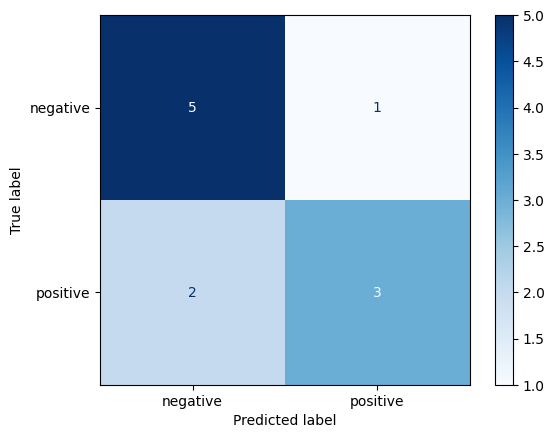

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap="Blues")
plt.show()


In [47]:
def predict(text, model, vectorizer):
    text_vectorized = vectorizer.transform([text])
    prediction = model.predict(text_vectorized)
    return prediction[0]

In [48]:
test_texts = [
    "Political analysts are divided on the long-term implications of recent political developments.",
    "The government's recent policies have received praise from some quarters but criticism from others.",
]

for text in test_texts:
    sentiment = predict(text, model, tfidf)
    print(f"Test_Text: {text}\nPredicted Sentiment: {sentiment}\n")


Test_Text: Political analysts are divided on the long-term implications of recent political developments.
Predicted Sentiment: negative

Test_Text: The government's recent policies have received praise from some quarters but criticism from others.
Predicted Sentiment: positive

